In [1]:
%matplotlib inline

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gp
import geoplot.crs as gcrs

In [3]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Assessor_Historical_Secured_Property_Tax_Rolls.csv')

/Users/daviderickson/anaconda3/envs/property_tax_rolls/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns[25]

'Percent of Ownership'

In [5]:
df.shape

(2238147, 43)

In [6]:
df.head(5)

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,...,660074.0,660074.0,0.0,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,...,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,...,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,...,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,...,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [7]:
df.describe()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,...,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District
count,2.238146e+06,2.238147e+06,2.064000e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,...,2.232637e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.237865e+06,2.238147e+06
mean,2.012061e+03,2.063252e+01,1.941636e+03,2.364135e+00,1.048956e+00,7.823049e+00,1.470800e+00,1.835442e+00,8.669454e+00,6.056058e-02,...,1.000725e+03,9.190668e-01,2.915795e+04,3.157840e+03,7.209944e+03,4.023147e+05,3.994016e+05,3.392403e+03,6.070209e+00,6.121937e+00
std,3.164951e+00,1.288068e+01,5.587058e+01,8.784859e+00,1.069431e+01,2.376514e+01,6.567046e+00,1.532557e+01,2.180097e+01,1.662870e+00,...,1.800430e+01,1.354783e+01,1.401633e+06,4.041963e+03,7.834920e+05,3.913785e+06,2.269509e+06,2.827261e+05,3.124298e+00,3.129490e+00
min,2.007000e+03,1.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.009000e+03,9.000000e+00,1.914000e+03,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.072400e+04,5.093500e+04,0.000000e+00,3.000000e+00,3.000000e+00
50%,2.012000e+03,1.900000e+01,1.935000e+03,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.867150e+05,1.966560e+05,0.000000e+00,7.000000e+00,6.000000e+00
75%,2.015000e+03,3.200000e+01,1.962000e+03,2.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+03,1.000000e+00,0.000000e+00,7.000000e+03,0.000000e+00,3.332948e+05,4.119580e+05,0.000000e+00,9.000000e+00,9.000000e+00
max,2.017000e+03,4.400000e+01,9.185000e+03,1.002000e+03,3.800000e+03,3.606000e+03,9.990000e+02,4.000000e+03,9.996000e+01,9.939000e+01,...,9.000000e+03,6.005000e+03,7.056831e+08,7.770000e+05,6.084663e+08,7.035785e+08,5.835724e+08,1.401327e+08,1.000000e+01,1.100000e+01


In [8]:
df.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID'],
      dt

Plot geometric plot (lat, lon) with color set by property value

In [9]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['the_geom']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lat.append(float(row.split(',')[0].split('(')[1]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lon.append(float(row.split(',')[1].split(')')[0]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

In [10]:
df['latitude']

0          37.783600
1          37.754820
2          37.805391
3          37.806098
4          37.713888
             ...    
2238142    37.794122
2238143    37.777799
2238144    37.810206
2238145    37.809896
2238146    37.780101
Name: latitude, Length: 2238147, dtype: float64

/Users/daviderickson/anaconda3/envs/property_tax_rolls/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


'lat, lon backwards?'

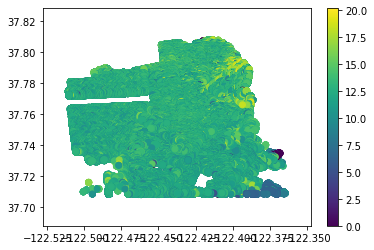

In [11]:
land_value = df['Assessed Land Value']
plt.scatter('longitude', 'latitude', data=df, c=np.log(land_value))
plt.colorbar()
'lat, lon backwards?'

In [12]:
df['Assessed Land Value'].describe()

count    2.238146e+06
mean     3.994016e+05
std      2.269509e+06
min      0.000000e+00
25%      5.093500e+04
50%      1.966560e+05
75%      4.119580e+05
max      5.835724e+08
Name: Assessed Land Value, dtype: float64

In [13]:
df['Closed Roll Year'].describe()

count    2.238146e+06
mean     2.012061e+03
std      3.164951e+00
min      2.007000e+03
25%      2.009000e+03
50%      2.012000e+03
75%      2.015000e+03
max      2.017000e+03
Name: Closed Roll Year, dtype: float64

In [22]:
# reading the shapefile
sftracts = gp.read_file("/Users/daviderickson/projects/datasf/data/analysis_neighborhoods_spatial/geo_export_57b549cc-4623-4ee9-adf0-0ffc0ee313d9.dbf")

# setting the census tract ID as index will make map creation easier later on!
#sftracts.set_index("tractce10", inplace=True)

sftracts.head()

,nhood,geometry
0,Bayview Hunters Point,POLYGON ((-122.3815777424142 37.75307043091241...
1,Bernal Heights,"POLYGON ((-122.403612999828 37.74933700015653,..."
2,Castro/Upper Market,POLYGON ((-122.4265550005568 37.76948499984702...
3,Chinatown,POLYGON ((-122.4062259995664 37.79755900029376...
4,Excelsior,POLYGON ((-122.4239820002333 37.73155199975518...


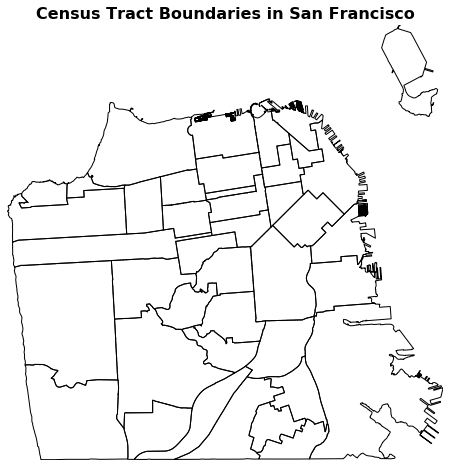

In [25]:
ax = gplt.polyplot(sftracts.geometry, projection = gcrs.LambertConformal(),
                   figsize=(12,8), edgecolor="k")
ax.set_title("Census Tract Boundaries in San Francisco", fontweight="bold", fontsize=16)
plt.show()

In [29]:
ax = gplt.aggplot(df,
                  projection=gcrs.LambertConformal(),
                  hue="Assessed Land Value", agg='mean', by="tractce10",
                  geometry=sftracts, cmap="coolwarm", linewidth=0, figsize=(12,8),
                  vmin=0, vmax = 400)

gplt.polyplot(sftracts.geometry, projection = gcrs.LambertConformal(),
                   figsize=(12,8), edgecolor="k")
ax.set_title("Assessed Land Value", fontweight="bold", fontsize=16)


land_value = df['Assessed Land Value']
ax.scatter('longitude', 'latitude', data=df, c=np.log(land_value))
# ax.colorbar()

AttributeError: module 'geoplot' has no attribute 'aggplot'